## A Guided Exploration of UN Data (Gross Domestic Product and Internet Usage)

---

3. Import the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

---

4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../../data/gdp_percapita.csv')

gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


---

5. How many rows and columns are in gdp_df? What are the data types of each column?

In [3]:
gdp_df.shape

(7662, 4)

7662 rows, 4 columns

In [4]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

string, int, float, float

---

6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')

gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [6]:
gdp_df = gdp_df.rename(columns = {'Country or Area' : 'Country', 'Value' : 'GDP_Per_Capita'})

gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


---

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [7]:
obs_by_country = gdp_df.groupby('Country').count().sort_values(by = 'Year', ascending = False)

obs_by_country

,Year,GDP_Per_Capita
Country,,
Least developed countries: UN classification,33,33
Middle East & North Africa,33,33
Middle East & North Africa (excluding high income),33,33
Middle income,33,33
Mongolia,33,33
...,...,...
Kosovo,15,15
Sint Maarten (Dutch part),14,14
Turks and Caicos Islands,12,12


In [8]:
obs_by_country[obs_by_country['Year'] == 33]

,Year,GDP_Per_Capita
Country,,
Least developed countries: UN classification,33,33
Middle East & North Africa,33,33
Middle East & North Africa (excluding high income),33,33
Middle income,33,33
Mongolia,33,33
...,...,...
Europe & Central Asia (IDA & IBRD),33,33
Europe & Central Asia (excluding high income),33,33
Georgia,33,33


It looks like 202 countries have data for all (33) years.  Note that some of these are not countries (Middle East & North Africa).  This means that 40 countries do not have data for all years (242-202 = 40)

In [9]:
obs_by_year = gdp_df.groupby('Year').count()

obs_by_year

,Country,GDP_Per_Capita
Year,,
1990,207,207
1991,208,208
1992,210,210
1993,211,211
1994,213,213
1995,223,223
1996,223,223
1997,226,226
1998,226,226


It looks like the number of observations per year was increasing from 1990 until 2020.  Then it decreases significantly in 2022

---

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

Histogram

<Axes: >

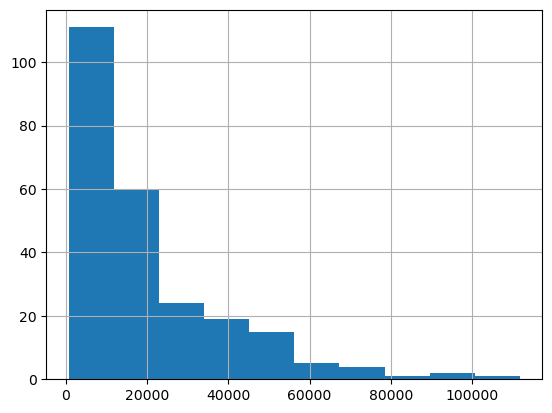

In [10]:
#Define a variable for the GDP per capita for the year 2020
gdp_per_cap2020 = gdp_df[gdp_df['Year'] == 2020]['GDP_Per_Capita']

#Create histogram
gdp_per_cap2020.hist(bins =10)

---

Density plot

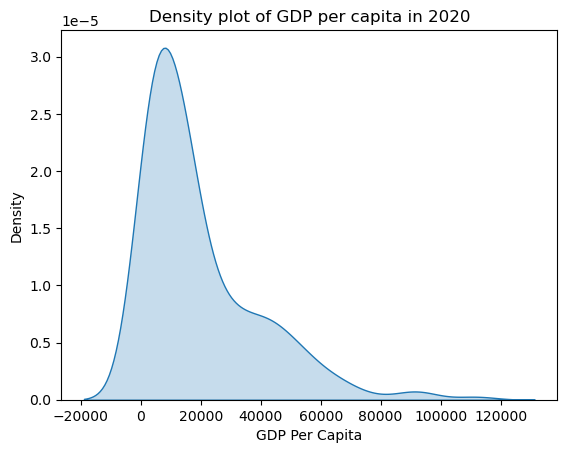

In [11]:
sns.kdeplot(data = gdp_per_cap2020, fill = True)

plt.xlabel('GDP Per Capita')
plt.title('Density plot of GDP per capita in 2020');

---

Boxplot

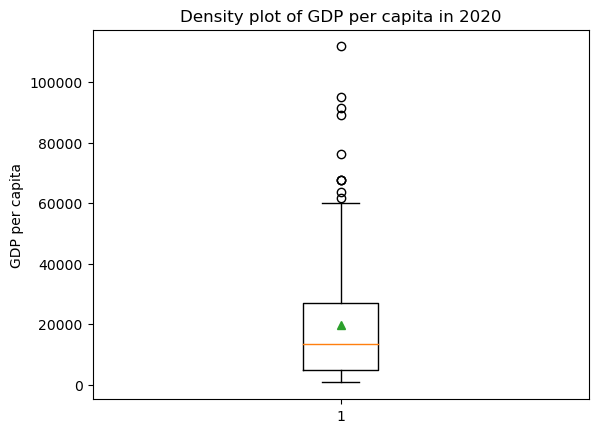

In [12]:
plt.boxplot(x = gdp_per_cap2020, showmeans = True)

plt.ylabel('GDP per capita')
plt.title('Density plot of GDP per capita in 2020');

---

Violin plot

Text(0.5, 1.0, 'Violin plot of GDP per capita in 2020')

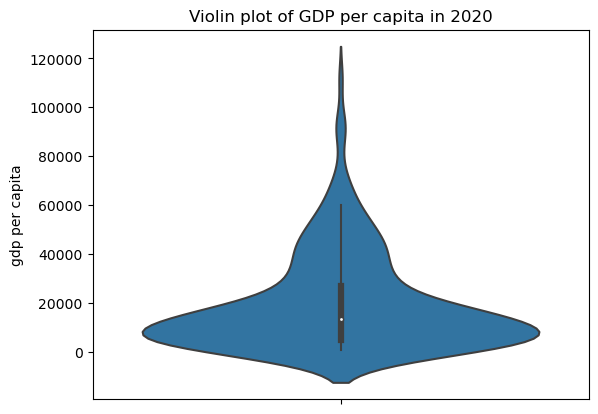

In [13]:
#Create plot
sns.violinplot(y = gdp_per_cap2020)

#Add labels
plt.ylabel('gdp per capita')
plt.title('Violin plot of GDP per capita in 2020')

In [14]:
gdp_per_cap2020

1        1968.341002
22       3455.023119
55       3957.933804
88      13278.369769
121     10844.770764
            ...     
7503    10450.622382
7536     5402.538773
7565    16204.169107
7598     3183.650773
7631     1990.319419
Name: GDP_Per_Capita, Length: 242, dtype: float64

---

9. What was the median GDP per capita value in 2020?

In [15]:
gdp_per_cap2020.median()

13357.997573370474

---

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

- A boxplot
- A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
- A scatterplot
- A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
- Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

---

Boxplot

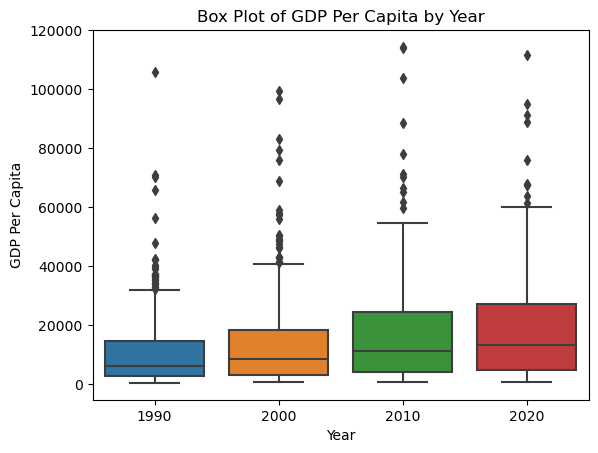

In [16]:
#Subset data
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

#Create boxplot
sns.boxplot(data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita')

#Add labels
plt.ylabel('GDP Per Capita')
plt.title('Box Plot of GDP Per Capita by Year');

---

Barplot

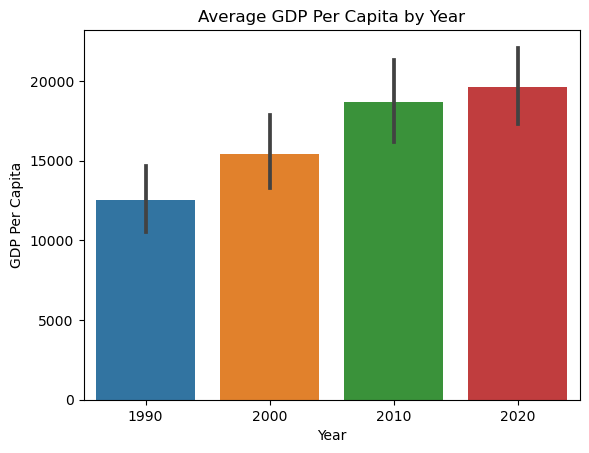

In [17]:
sns.barplot(data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita', estimator = 'mean')

plt.ylabel('GDP Per Capita')
plt.title('Average GDP Per Capita by Year');

The default aggregation method is: estimator = 'mean'.  This can be changed to np.sum, np.median, etc.

---

Scatterplot

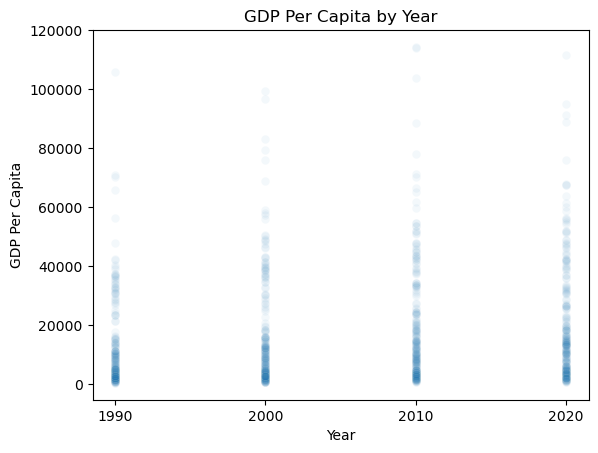

In [18]:
#Plot
sns.scatterplot(data = gdp_decades, 
                x = 'Year', 
                y = 'GDP_Per_Capita', 
                alpha = .05)

#Labels
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita by Year')

#Specify xticks
plt.xticks([1990, 2000, 2010, 2020]);

---

Scatterplot with a trend line

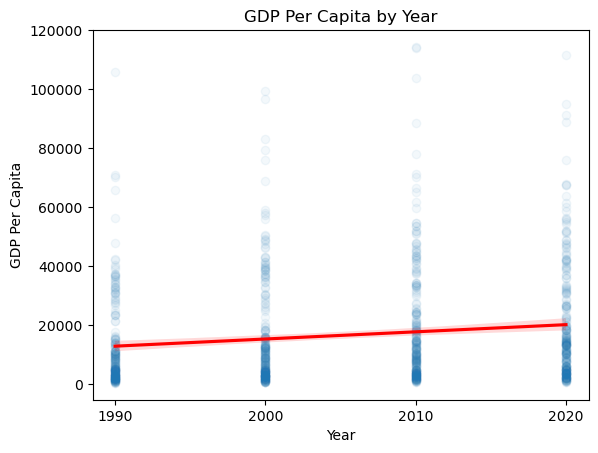

In [19]:
#Plot
sns.regplot(data = gdp_decades, 
            x = 'Year', 
            y = 'GDP_Per_Capita', 
            scatter_kws = {'alpha': 0.05},
            line_kws = {'color' : 'red'})

#Labels
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita by Year')

#Specify xticks
plt.xticks([1990, 2000, 2010, 2020]);

---

11. Which country was the first to have a GDP per capita greater than $100,000?

In [20]:
gdp_df[gdp_df['GDP_Per_Capita'] >= 100000].sort_values(by = 'Year')

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


In the year 1990, United Arab Emirates was the only country to have a GDP per capita greater than $100,000

---

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [21]:
data_2020 = gdp_df[gdp_df['Year'] == 2020].sort_values(by = 'GDP_Per_Capita', ascending = False)

data_2020.head()

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744


Luxembourg had the highest GDP per capita in 2020

In [22]:
#Subset the dataframe to include only Luxembourg
lux_data = gdp_df[gdp_df['Country'] == 'Luxembourg'].sort_values(by = 'Year')

lux_data

,Country,Year,GDP_Per_Capita
4178,Luxembourg,1990,70860.819124
4177,Luxembourg,1991,75961.668717
4176,Luxembourg,1992,76323.304753
4175,Luxembourg,1993,78468.921760
4174,Luxembourg,1994,80365.224508
4173,Luxembourg,1995,80379.127629
4172,Luxembourg,1996,80401.032017
4171,Luxembourg,1997,83702.813530
4170,Luxembourg,1998,88185.800110
4169,Luxembourg,1999,94115.384035


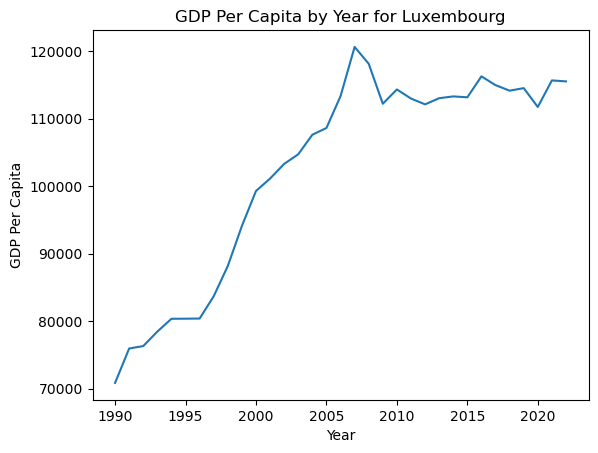

In [23]:
#Create a line plot
sns.lineplot(data = lux_data, 
             x = 'Year', 
             y = 'GDP_Per_Capita',
             errorbar = None)

#Plot labels
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita by Year for Luxembourg');

---

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [24]:
data_2020.tail()

,Country,Year,GDP_Per_Capita
5074,Niger,2020,1214.546556
6273,Somalia,2020,1127.418534
1630,Dem. Rep. Congo,2020,1044.071214
1217,Central African Republic,2020,847.765012
973,Burundi,2020,711.355263


Burundi has the lowest GDP per capita in 2020

In [25]:
#Subset the dataframe to include only Burundi
bur_data = gdp_df[gdp_df['Country'] == 'Burundi'].sort_values(by = 'Year')

bur_data

,Country,Year,GDP_Per_Capita
1003,Burundi,1990,1175.155086
1002,Burundi,1991,1209.388158
1001,Burundi,1992,1190.067435
1000,Burundi,1993,1153.541309
999,Burundi,1994,1103.167298
998,Burundi,1995,956.490976
997,Burundi,1996,880.309412
996,Burundi,1997,867.284265
995,Burundi,1998,891.699844
994,Burundi,1999,862.006680


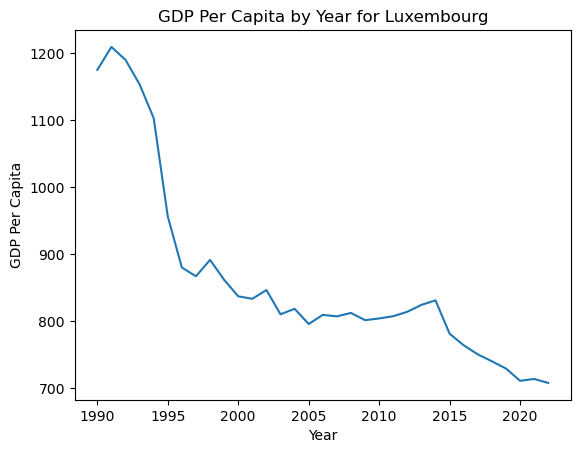

In [26]:
#Create a line plot
sns.lineplot(data = bur_data, 
             x = 'Year', 
             y = 'GDP_Per_Capita',
             errorbar = None)

#Plot labels
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita by Year for Luxembourg');

---

Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

I create a data frame with GDP per capita in 1990

In [27]:
#Filter for only 1990
gdp_1990 = gdp_df[gdp_df['Year'] == 1990]

#drop the year column
gdp_1990 = gdp_1990[['Country', 'GDP_Per_Capita']]

#change GDP_Per_Capita to GDP_Per_Capita_1990
gdp_1990 = gdp_1990.rename(columns = {'GDP_Per_Capita' : 'GDP_Per_Capita_1990'})

#display the first five rows
gdp_1990.head()

,Country,GDP_Per_Capita_1990
52,Africa Eastern and Southern,3037.297466
85,Africa Western and Central,2788.301039
118,Albania,4827.027705
151,Algeria,8828.874473
184,Angola,5793.084512


I create another data frame with GDP per capita in 2020

In [28]:
#Filter for only 2020
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]

#drop the year column
gdp_2020 = gdp_2020[['Country', 'GDP_Per_Capita']]

#change GDP_Per_Capita to GDP_Per_Capita_2020
gdp_2020 = gdp_2020.rename(columns = {'GDP_Per_Capita' : 'GDP_Per_Capita_2020'})

gdp_2020.head()

,Country,GDP_Per_Capita_2020
1,Afghanistan,1968.341002
22,Africa Eastern and Southern,3455.023119
55,Africa Western and Central,3957.933804
88,Albania,13278.369769
121,Algeria,10844.770764


In [29]:
#merge the data frames together on Country
gdp_range = pd.merge(gdp_1990, gdp_2020, on = 'Country', how = 'outer')

gdp_range.head()

,Country,GDP_Per_Capita_1990,GDP_Per_Capita_2020
0,Africa Eastern and Southern,3037.297466,3455.023119
1,Africa Western and Central,2788.301039,3957.933804
2,Albania,4827.027705,13278.369769
3,Algeria,8828.874473,10844.770764
4,Angola,5793.084512,6029.691895


In [30]:
#add a column to the data frame that shows the difference in gdp from 1990 to 2020
gdp_range['difference_1990_2020'] = gdp_range['GDP_Per_Capita_2020'] - gdp_range['GDP_Per_Capita_1990']

gdp_range

,Country,GDP_Per_Capita_1990,GDP_Per_Capita_2020,difference_1990_2020
0,Africa Eastern and Southern,3037.297466,3455.023119,417.725653
1,Africa Western and Central,2788.301039,3957.933804,1169.632765
2,Albania,4827.027705,13278.369769,8451.342064
3,Algeria,8828.874473,10844.770764,2015.896290
4,Angola,5793.084512,6029.691895,236.607383
...,...,...,...,...
237,Small states,NaN,19026.366476,NaN
238,Somalia,NaN,1127.418534,NaN
239,Timor-Leste,NaN,4856.518291,NaN
240,Turks and Caicos Islands,NaN,18474.865995,NaN


---

Countries that had a higher GDP in 2020 than in 1990

In [31]:
gdp_range[gdp_range['difference_1990_2020'] > 0].shape

(188, 4)

In [32]:
gdp_range[gdp_range['difference_1990_2020'] < 0].shape

(19, 4)

In [33]:
gdp_range[gdp_range['difference_1990_2020'].isna()].shape

(35, 4)

188 countries had a higher GDP in 2020 than in 1990

19 countries had a lower GDP in 2020 than in 1990

35 countries do not have sufficient data for comparison

---

14. Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [34]:
#read in the data (only the first 4495 rows, everything after this is footnotes)
internet_df = pd.read_csv('../../data/internet_use.csv', nrows = 4495)

internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [35]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

---

15. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [36]:
#Drop the Value Footnotes column
internet_df = internet_df.drop(columns = 'Value Footnotes')

#rename columns
internet_df = internet_df.rename(columns = {'Country or Area' : 'Country', 'Value' : 'Internet_Users_Pct'})

internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


---

16. Look at the number of observations in this dataset per year. What do you notice?

In [37]:
#count number of observations per year
obs_per_year = internet_df['Year'].value_counts().reset_index()

#rename columns
obs_per_year = obs_per_year.rename(columns = {'index' : 'year', 'Year' : 'count'})

#sort by year
obs_per_year = obs_per_year.sort_values(by = 'year')

#view df
obs_per_year

,year,count
42,1960,7
27,1965,7
28,1970,7
29,1975,7
30,1976,7
31,1977,7
32,1978,7
33,1979,7
26,1980,7
35,1981,7


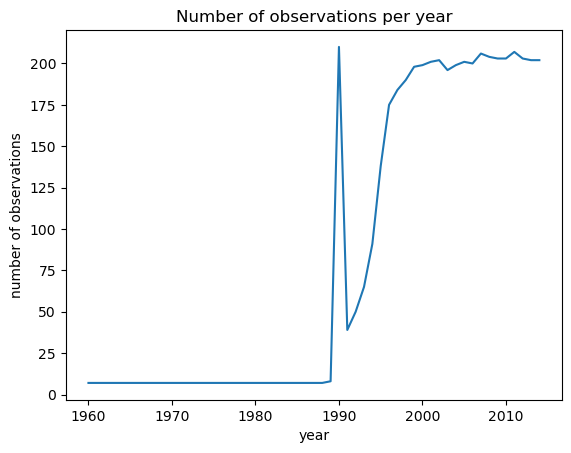

In [38]:
#Create a line plot
sns.lineplot(data = obs_per_year, 
             x = 'year', 
             y = 'count')

#Plot labels
plt.ylabel('number of observations')
plt.title('Number of observations per year');

The number of observations was very low until the year 1990.  There was a sharp drop after 1990, followed by a sharp increase until around the year 2000.  Since the year 2000, it has remained steady

---

17. What is the first year to have a non-zero internet users percentage value?

In [39]:
internet_df[internet_df['Internet_Users_Pct'] != 0].sort_values(by = 'Year')

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


1990 was the first year to have a non-zero internet users percentage value

---

18. How does the distribution of internet users percent differ for 2000 and 2014?

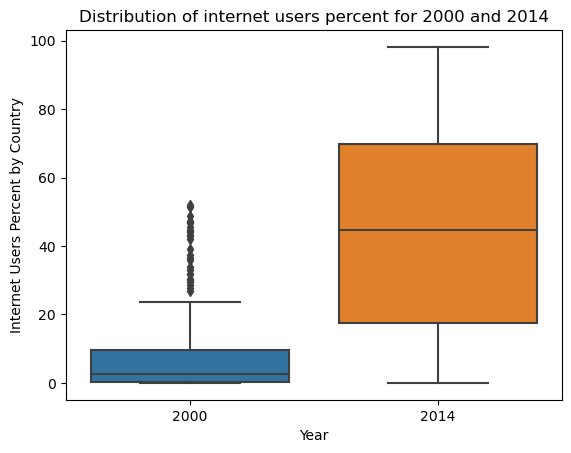

In [40]:
#Subset data
users_2000_2014 = internet_df[internet_df['Year'].isin([2000, 2014])]

#Create boxplot
sns.boxplot(data = users_2000_2014, x = 'Year', y = 'Internet_Users_Pct')

#Add labels
plt.ylabel('Internet Users Percent by Country')
plt.title('Distribution of internet users percent for 2000 and 2014');

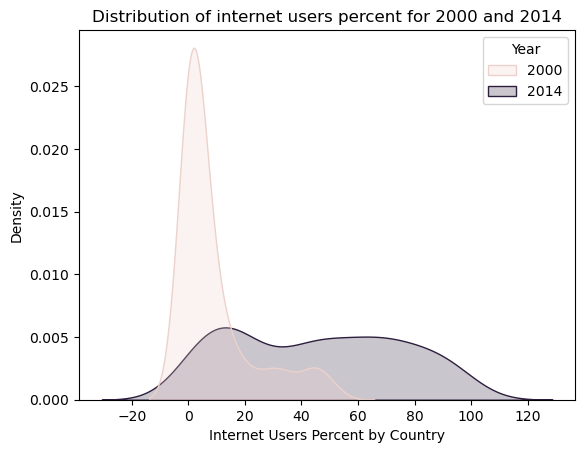

In [41]:
#density plot
sns.kdeplot(data = users_2000_2014, x = 'Internet_Users_Pct', hue = 'Year', fill = True)

plt.xlabel('Internet Users Percent by Country')
plt.title('Distribution of internet users percent for 2000 and 2014');

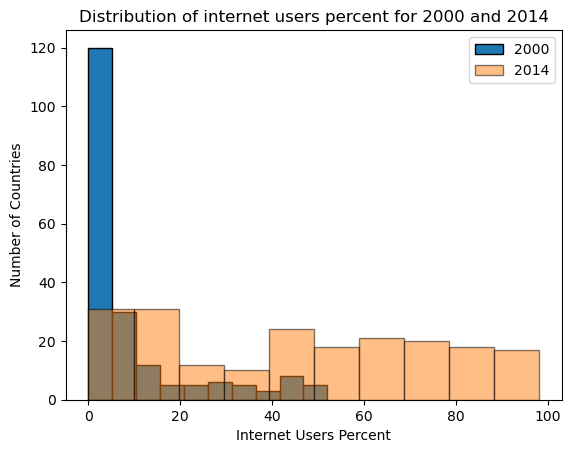

In [42]:
#histogram for the year 2000
plt.hist(data = users_2000_2014[users_2000_2014['Year'] == 2000], 
         x = 'Internet_Users_Pct',
         edgecolor = 'black',
         label = '2000')

#histogram for the year 2014
plt.hist(data = users_2000_2014[users_2000_2014['Year'] == 2014], 
         x = 'Internet_Users_Pct',
         alpha = 0.5,
         edgecolor = 'black',
         label = '2014')

#labels and title
plt.xlabel('Internet Users Percent')
plt.ylabel('Number of Countries')
plt.title('Distribution of internet users percent for 2000 and 2014')

#view legend
plt.legend()

---

19. For how many countries was the percentage of internet users below 5% in 2014?

In [43]:
#define a variable for internet users in 2014
users_2014 = users_2000_2014[users_2000_2014['Year'] == 2014]

#filter for rows where usage is below %5 and view rows/columns
users_2014[users_2014['Internet_Users_Pct'] < 5].shape

(16, 3)

There were 16 countries with internet users below 5% in 2014

---

20. Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

In [44]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on = ['Country', 'Year'], how = 'outer')

gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
8731,Yemen,1999,NaN,0.056629
8732,Yemen,1998,NaN,0.023323
8733,Yemen,1997,NaN,0.015025
8734,Yemen,1996,NaN,0.000621


---

21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [45]:
#filter dataframe to include only the year 2014
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

#sort values by internet users and view the top three
gdp_and_internet_use_2014.sort_values(by = 'Internet_Users_Pct', ascending = False).head(3)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2993,Iceland,2014,50450.741612,98.16
687,Bermuda,2014,77361.104881,96.80
5212,Norway,2014,62838.515727,96.30


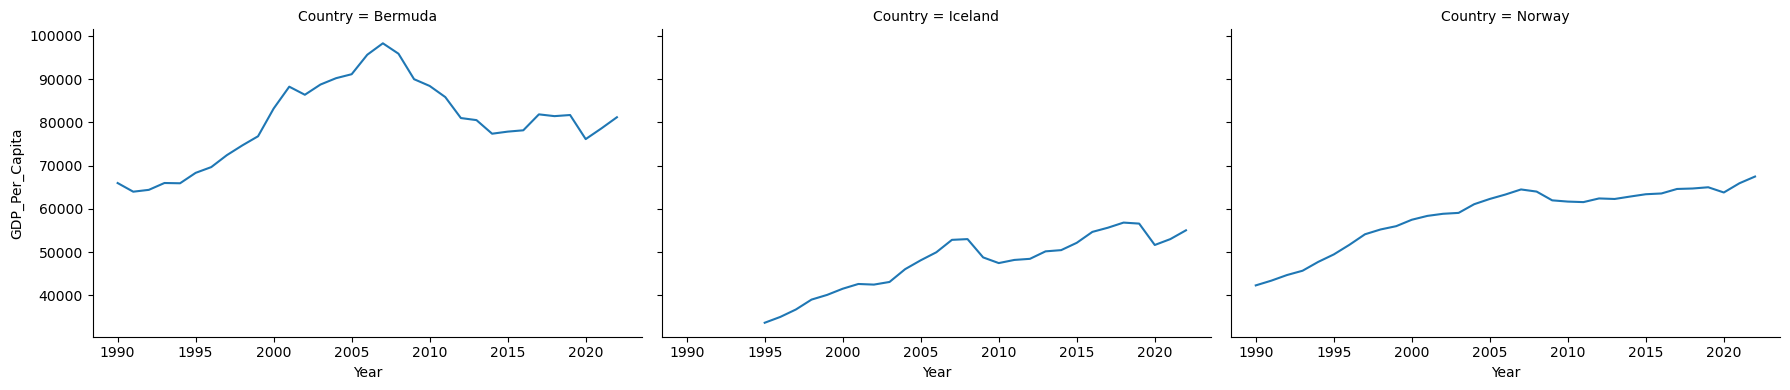

In [46]:
#define a variable that contains only the countries 'Iceland','Bermuda', and 'Norway'
top3 = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Iceland','Bermuda', 'Norway'])]

#create a FacetGrid
grid = sns.FacetGrid(data = top3, 
                     col = 'Country',
                     height = 4,
                     aspect = 1.5)

#map a line plot onto the grid
grid.map(sns.lineplot, 'Year', 'GDP_Per_Capita')

Bermuda's growth increaed until about 2008, then declined.  Iceland and Norway saw small declines in 2008, but for the most part, their economies have been growing at a steady pace.

Overall, Bermuda has a stronger economy than either Iceland or Norway

---

22. Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.

*this has already been done in a previous step*

---

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

Text(0, 0.5, 'GDP Per Capita')

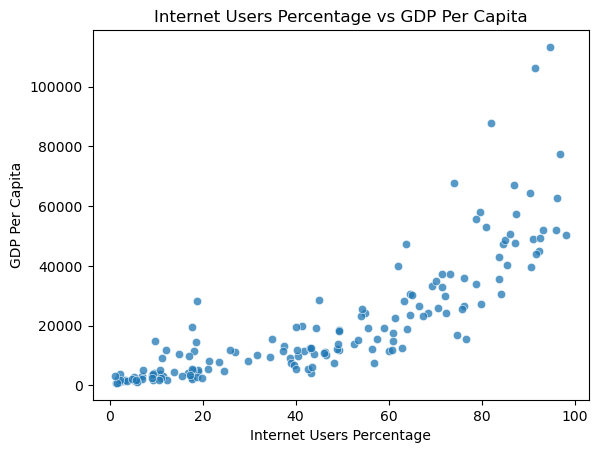

In [47]:
#create a scatterplot
sns.scatterplot(data = gdp_and_internet_use_2014, 
                x = 'Internet_Users_Pct', 
                y = 'GDP_Per_Capita',
                alpha = .75)

#labels
plt.title('Internet Users Percentage vs GDP Per Capita')
plt.xlabel('Internet Users Percentage')
plt.ylabel('GDP Per Capita')

---

24. Stretch Question: Use the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [48]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7,Afghanistan,2014,2144.449634,6.39
28,Africa Eastern and Southern,2014,3642.875373,NaN
61,Africa Western and Central,2014,4146.994622,NaN
94,Albania,2014,11586.817446,60.10
127,Algeria,2014,11561.259795,18.09
...,...,...,...,...
8589,T.F.Y.R. Macedonia,2014,NaN,68.06
8647,Turkey,2014,NaN,51.04
8670,Venezuela,2014,NaN,57.00
8694,Virgin Islands (U.S.),2014,NaN,50.07


In [49]:
#define labels 
quantile_labels = ["Low", "Medium", "High"]

#use qcut to bin the values into three bins
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], 
                                                     q = 3,
                                                     labels = quantile_labels)

gdp_and_internet_use_2014

C:\Users\isaac\AppData\Local\Temp\ipykernel_13028\2633169708.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'],


,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
7,Afghanistan,2014,2144.449634,6.39,Low
28,Africa Eastern and Southern,2014,3642.875373,NaN,Low
61,Africa Western and Central,2014,4146.994622,NaN,Low
94,Albania,2014,11586.817446,60.10,Medium
127,Algeria,2014,11561.259795,18.09,Medium
...,...,...,...,...,...
8589,T.F.Y.R. Macedonia,2014,NaN,68.06,NaN
8647,Turkey,2014,NaN,51.04,NaN
8670,Venezuela,2014,NaN,57.00,NaN
8694,Virgin Islands (U.S.),2014,NaN,50.07,NaN


---

25. Stretch Question: How does the median internet users percentage compare for the three gdp groups?

In [50]:
median_users_by_group = gdp_and_internet_use_2014.groupby('GDP_group').median()[['Internet_Users_Pct']]

median_users_by_group

C:\Users\isaac\AppData\Local\Temp\ipykernel_13028\1974486609.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_users_by_group = gdp_and_internet_use_2014.groupby('GDP_group').median()[['Internet_Users_Pct']]


,Internet_Users_Pct
GDP_group,
Low,10.6
Medium,43.4
High,78.7


In [51]:
median_users_by_group = median_users_by_group.reset_index()

median_users_by_group

,GDP_group,Internet_Users_Pct
0,Low,10.6
1,Medium,43.4
2,High,78.7


Text(0, 0.5, 'Median Internet User Percentage')

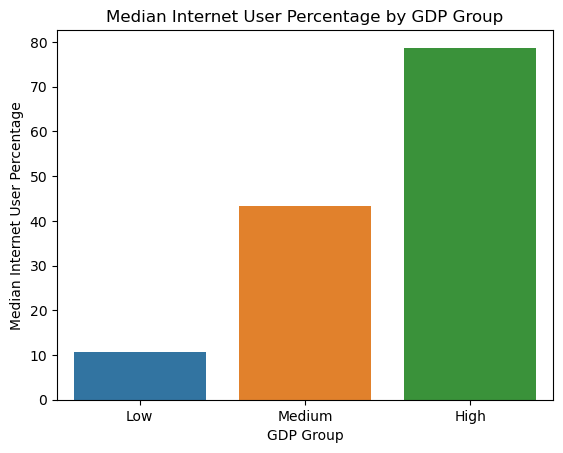

In [54]:
sns.barplot(data = median_users_by_group, x = 'GDP_group', y = 'Internet_Users_Pct')

#labels 
plt.title('Median Internet User Percentage by GDP Group')
plt.xlabel('GDP Group')
plt.ylabel('Median Internet User Percentage')

Mean internet usage is lowest for the group with the low gdp and highest for the group with the highest gdp